# Gradient Boosting
It is a **greedy** algorithm which tries to minimize the loss(error).
Gradient boosting algorithm is one of the most powerful algorithms in the field of machine learning. As we know that the errors in machine learning algorithms are broadly classified into two categories i.e. Bias Error and Variance Error. As gradient boosting is one of the boosting algorithms it is used to minimize bias error of the model.<br>

Unlike, Adaboosting algorithm, the base estimator in the gradient boosting algorithm cannot be mentioned by us. The base estimator for the Gradient Boost algorithm is fixed and i.e. Decision Stump. Like, AdaBoost, we can tune the n_estimator of the gradient boosting algorithm. However, if we do not mention the value of n_estimator, the default value of n_estimator for this algorithm is 100.
<br>Gradient boosting algorithm can be used for predicting not only continuous target variable (as a Regressor) but also categorical target variable (as a Classifier). When it is used as a regressor, the cost function is Mean Square Error (MSE) and when it is used as a classifier then the cost function is Log loss.
#### Basic Algorithm :
1. Take input data ,calculate the average i.e. mean of the output. This average is calculated by Base model as a prediction to reduce the loss function for model.
2. Now find the residual i.e. **actual output-avg. value**.
3. Now train the first decisoin tree (stump) on thiis resudal as target variable.And split the input data based on a feature.(This process can also be described as prediction from first decison tree after base model).
4. The final output for our 2-estimators is calculated as follows.**let say we are predicting Age based on 2 features 1. Like exercising 2. Go to Gym**<br> First, the age will be predicted from estimator 1 as per the value of LikeExercising, and then the mean from the estimator is found out with the help of the value of GotoGym and then that means is added to age-predicted from the first estimator and that is the final prediction of Gradient boosting with two estimators.
5. If still the error between the actual output and predicted value is not minimized then we add another decision tree to the week learners.And repeat the same process of calculating the residual and training the stump.
6. As Gradient descent is a greedy algo it has high chances of overfitting. So we add a hyperparameter called **learning rate => alpha**, it reduces the effect of single model on output.

<br><code>refrence link : <link>https://www.analyticsvidhya.com/blog/2021/04/how-the-gradient-boosting-algorithm-works/</link><code>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [49]:
#train=pd.read_csv('../data_sets/wine_quality/train.csv')
train=pd.read_csv(r'C:\Users\vikash arya\datascience\datascience_krishnaik\data_sets\wine_quality\train.csv')
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [50]:
train.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


C:\Users\vikash arya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vikash arya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vikash arya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

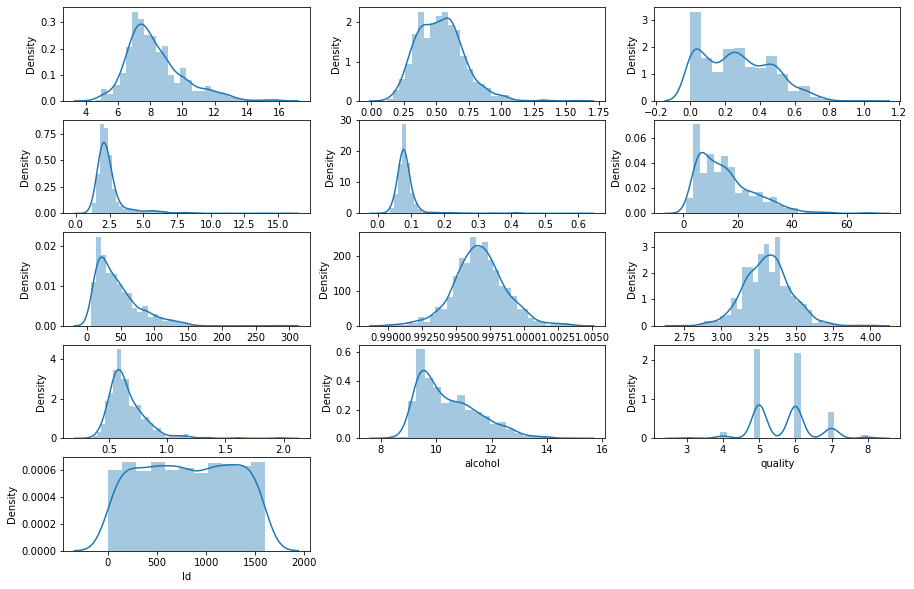

In [51]:
plt.figure(figsize=(15,10))

for i in range(1,len(train.columns)+1):

    plt.subplot(5,3,i)
    sns.distplot(train[train.columns[i-1]])


In [52]:
train.shape,train.isnull().sum()

((1143, 13),
 fixed acidity           0
 volatile acidity        0
 citric acid             0
 residual sugar          0
 chlorides               0
 free sulfur dioxide     0
 total sulfur dioxide    0
 density                 0
 pH                      0
 sulphates               0
 alcohol                 0
 quality                 0
 Id                      0
 dtype: int64)

In [53]:
l=[]
for  i in train.columns:
    if train[i].dtypes=='object':
        l.append(i)
l

[]

In [54]:
# lets standardize the data
from sklearn.preprocessing import StandardScaler
x=train.iloc[:,:-2]
y=train.iloc[:,-2:-1]
scale=StandardScaler()
x_scaled=scale.fit_transform(x)
x_scaled

array([[-0.52157961,  0.93933222, -1.36502663, ...,  1.27069495,
        -0.57365783, -0.96338181],
       [-0.29259344,  1.94181282, -1.36502663, ..., -0.70892755,
         0.1308811 , -0.59360107],
       [-0.29259344,  1.27349242, -1.16156762, ..., -0.32577481,
        -0.04525363, -0.59360107],
       ...,
       [-1.20853813,  0.38239855, -0.9581086 , ...,  0.88754221,
        -0.45623467,  0.05351522],
       [-1.38027776,  0.10393172, -0.8563791 , ...,  1.33455374,
         0.60057372,  0.70063152],
       [-1.38027776,  0.6330187 , -0.75464959, ...,  1.65384769,
         0.30701583, -0.22382033]])

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
gbr=GradientBoostingRegressor(**gbr_params)
gbr.fit(x_scaled,y)



C:\Users\vikash arya\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor(learning_rate=0.01, min_samples_split=5,
                          n_estimators=1000)

In [56]:
y_train_pred=gbr.predict(x_scaled)
print('R^2 for training data : ',gbr.score(x_scaled,y))

R^2 for training data :  0.6459332203470987


<BarContainer object of 11 artists>

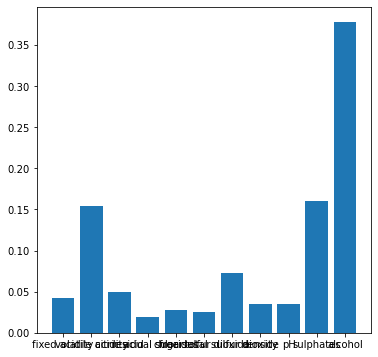

In [79]:
imp=list(gbr.feature_importances_)
plt.figure(figsize=(6,6))
plt.bar(x.columns,imp,align='center')
